# PDE megoldó FiPy csomaggal


A következő package-ek szükségesek:
- future
- fipy
- numpy
- matplotlib
- scipy

### Importálások

In [17]:
from fipy import *
from fipy.tools import numerix
import matplotlib.pyplot as plt

A megoldandó differenciálegyenlet alakja:

$$ \frac{\partial f(r,t)}{\partial t}=D\frac{\partial^2 f(r,t)}{\partial r^2}-K\frac{\partial f(r,t)}{\partial r}+S $$

In [18]:
R = 10.  ## teljes hossz, amire lefut a program
nr = 20  ## ennyi részre lesz felosztva
dr = R / nr
mesh = Grid1D(dx=dr, nx=nr)  ## új mesh nr számú dr széles lépésközzel

## diffúziós-, konvekciós- és forrásegyütthatók (D, K, S)
diffCoeff = 1.
convCoeff = [1.,]
sourceCoeff = 1.

## idő bevezetése
duration = Variable(10.)
dt = Variable(0.1)
t = Variable(0.)
imax = int((duration.value / dt.value) + 1)
i = 0
print(imax)

## határfeltételekhez adatok
valueLeft = 1.
gradLeft = (0.,)
valueRight = 0.

## "megoldási változó" - sűrűségfv
f = CellVariable(mesh=mesh, name="sűrűségfv", value=1.) # kezdeti feltétel az egész tartományra
f.setValue(10., where= mesh.x == R/2)

## határfeltételek érvényesítése
f.constrain(valueLeft, mesh.facesLeft)
f.faceGrad.constrain(gradLeft, where=mesh.facesLeft)
f.constrain(valueRight, mesh.facesRight)

101


### A kezdeti feltételek megadása

A CellVariable inicializálásakor meg lehet adni az egész tartományra vonatkozó, vagy a tartomány részeire vonatkozó kezdeti feltételeket is. ld.: https://www.ctcms.nist.gov/fipy/examples/diffusion/generated/examples.diffusion.mesh1D.html

Kódrészletként kikommentelve, hogy a notebook futtatásakor ne okozzon problémát:

In [19]:
## phi.value = 0.
## phi.setValue(1., where=(x > L/2. - L/10.) & (x < L/2. + L/10.))

### Az egyenlet, annak megoldása és az eredmények ábrázolása

Ellenőrzést számértékileg is végzek, de a grafikonokon látható, hogy a dinamikus lista minden eleme felveszi f() legújabb értékét, ami nem az elvárt működés.

Megfigyelhető továbbá, hogy a következő cellában az 5 helyett 2-szer futtatva a megoldót, teljesen más eredményt kapunk, viszont az eredmények listában tárolása továbbra sem működik.

Az utolsó cellában numpy.array()-ben tárolva a megjelenítési nehézségek miatt sem működik az elvártaknak megfelelően a program.

[1.23907828 1.55247536 1.80399661 1.99897825 2.14568561 2.25329304
 2.33051984 2.38490443 2.4225423  2.44809118 2.46487237 2.47491527
 2.4787649  2.47476183 2.45725211 2.41271353 2.31200594 2.0958268
 1.64899325 0.75702055]
[1.23907828 1.55247536 1.80399661 1.99897825 2.14568561 2.25329304
 2.33051984 2.38490443 2.4225423  2.44809118 2.46487237 2.47491527
 2.4787649  2.47476183 2.45725211 2.41271353 2.31200594 2.0958268
 1.64899325 0.75702055]


C:\ProgramData\Anaconda3\lib\site-packages\fipy\viewers\matplotlibViewer\__init__.py:120: UserWarning: Matplotlib1DViewer efficiency is improved by setting the 'datamax' and 'datamin' keys
  return Matplotlib1DViewer(vars=vars, title=title, axes=axes, **kwlimits)
C:\ProgramData\Anaconda3\lib\site-packages\fipy\viewers\matplotlibViewer\__init__.py:120: UserWarning: Matplotlib1DViewer efficiency is improved by setting the 'datamax' and 'datamin' keys
  return Matplotlib1DViewer(vars=vars, title=title, axes=axes, **kwlimits)


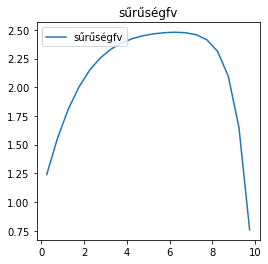

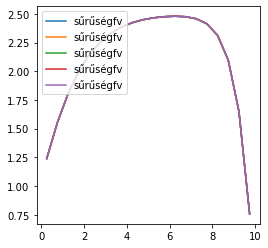

In [20]:
## az egyenlet alakja FiPy-ban az együtthatókkal
eq = (TransientTerm() == DiffusionTerm(coeff=diffCoeff)
      - PowerLawConvectionTerm(coeff=convCoeff)
      + sourceCoeff)

# solution1D = numerix.empty(imax, CellVariable)  # 1D üres numpy array
solution1D = []  # 1D üres dinamikus lista


t = t + dt
eq.solve(var=f, solver=DummySolver(), dt=t)
solution1D.append(f)

t = t + dt
eq.solve(var=f, solver=DummySolver(), dt=t)
solution1D.append(f)

t = t + dt
eq.solve(var=f, solver=DummySolver(), dt=t)
solution1D.append(f)

t = t + dt
eq.solve(var=f, solver=DummySolver(), dt=t)
solution1D.append(f)

t = t + dt
eq.solve(var=f, solver=DummySolver(), dt=t)
solution1D.append(f)

print(solution1D[0].value)
print(solution1D[1].value)
viewer = Viewer(vars=f)
viewer = Viewer(vars=solution1D)

#viewer1 = Viewer(vars=solution2D[1])
#viewer2 = Viewer(vars=solution2D[99])

[1.14519657 1.2566519  1.28815869 1.29681359 1.29914771 1.29976568
 1.29991767 1.29993045 1.29987036 1.29970735 1.29932345 1.29843408
 1.29638344 1.29167793 1.28095539 1.25677885 1.20315768 1.08734924
 0.84832897 0.39556772]
[1.14519657 1.2566519  1.28815869 1.29681359 1.29914771 1.29976568
 1.29991767 1.29993045 1.29987036 1.29970735 1.29932345 1.29843408
 1.29638344 1.29167793 1.28095539 1.25677885 1.20315768 1.08734924
 0.84832897 0.39556772]


C:\ProgramData\Anaconda3\lib\site-packages\fipy\viewers\matplotlibViewer\__init__.py:120: UserWarning: Matplotlib1DViewer efficiency is improved by setting the 'datamax' and 'datamin' keys
  return Matplotlib1DViewer(vars=vars, title=title, axes=axes, **kwlimits)
C:\ProgramData\Anaconda3\lib\site-packages\fipy\viewers\matplotlibViewer\__init__.py:120: UserWarning: Matplotlib1DViewer efficiency is improved by setting the 'datamax' and 'datamin' keys
  return Matplotlib1DViewer(vars=vars, title=title, axes=axes, **kwlimits)


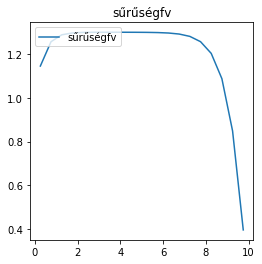

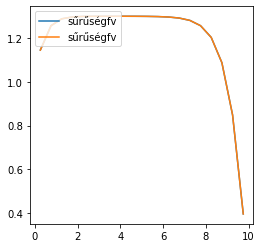

In [21]:
R = 10.  ## teljes hossz, amire lefut a program
nr = 20  ## ennyi részre lesz felosztva
dr = R / nr
mesh = Grid1D(dx=dr, nx=nr)  ## új mesh nr számú dr széles lépésközzel

## diffúziós-, konvekciós- és forrásegyütthatók
diffCoeff = 1.
convCoeff = [1.,]
sourceCoeff = 1.

## idő bevezetése
duration = Variable(10.)
dt = Variable(0.1)
t = Variable(0.)
imax = int((duration.value / dt.value) + 1)
i = 0

## határfeltételekhez adatok
valueLeft = 1.
gradLeft = (0.,)
valueRight = 0.

## "megoldási változó" - sűrűségfv
f = CellVariable(mesh=mesh, name="sűrűségfv", value=1.) # kezdeti feltétel az egész tartományra
f.setValue(10., where= mesh.x == R/2)

## határfeltételek érvényesítése
f.constrain(valueLeft, mesh.facesLeft)
f.faceGrad.constrain(gradLeft, where=mesh.facesLeft)
f.constrain(valueRight, mesh.facesRight)

## az egyenlet alakja FiPy-ban az együtthatókkal
eq = (TransientTerm() == DiffusionTerm(coeff=diffCoeff)
      + PowerLawConvectionTerm(coeff=convCoeff)
      + sourceCoeff)

# solution1D = numerix.empty(imax, CellVariable)  # 1D üres numpy array
solution1D = []  # 1D üres dinamikus lista


t = t + dt
eq.solve(var=f, solver=DummySolver(), dt=t)
solution1D.append(f)

t = t + dt
eq.solve(var=f, solver=DummySolver(), dt=t)
solution1D.append(f)


print(solution1D[0].value)
print(solution1D[1].value)
viewer = Viewer(vars=f)
viewer = Viewer(vars=solution1D)

[1.14519657 1.2566519  1.28815869 1.29681359 1.29914771 1.29976568
 1.29991767 1.29993045 1.29987036 1.29970735 1.29932345 1.29843408
 1.29638344 1.29167793 1.28095539 1.25677885 1.20315768 1.08734924
 0.84832897 0.39556772]
[1.14519657 1.2566519  1.28815869 1.29681359 1.29914771 1.29976568
 1.29991767 1.29993045 1.29987036 1.29970735 1.29932345 1.29843408
 1.29638344 1.29167793 1.28095539 1.25677885 1.20315768 1.08734924
 0.84832897 0.39556772]


C:\ProgramData\Anaconda3\lib\site-packages\fipy\viewers\matplotlibViewer\__init__.py:120: UserWarning: Matplotlib1DViewer efficiency is improved by setting the 'datamax' and 'datamin' keys
  return Matplotlib1DViewer(vars=vars, title=title, axes=axes, **kwlimits)


AttributeError: 'numpy.ndarray' object has no attribute 'mesh'

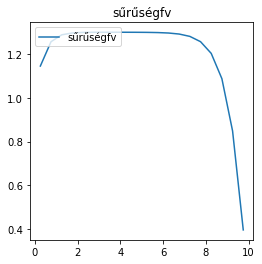

In [22]:
R = 10.  ## teljes hossz, amire lefut a program
nr = 20  ## ennyi részre lesz felosztva
dr = R / nr
mesh = Grid1D(dx=dr, nx=nr)  ## új mesh nr számú dr széles lépésközzel

## diffúziós-, konvekciós- és forrásegyütthatók
diffCoeff = 1.
convCoeff = [1.,]
sourceCoeff = 1.

## idő bevezetése
duration = Variable(10.)
dt = Variable(0.1)
t = Variable(0.)
imax = int((duration.value / dt.value) + 1)
i = 0

## határfeltételekhez adatok
valueLeft = 1.
gradLeft = (0.,)
valueRight = 0.

## "megoldási változó" - sűrűségfv
f = CellVariable(mesh=mesh, name="sűrűségfv", value=1.) # kezdeti feltétel az egész tartományra
f.setValue(10., where= mesh.x == R/2)

## határfeltételek érvényesítése
f.constrain(valueLeft, mesh.facesLeft)
f.faceGrad.constrain(gradLeft, where=mesh.facesLeft)
f.constrain(valueRight, mesh.facesRight)

## az egyenlet alakja FiPy-ban az együtthatókkal
eq = (TransientTerm() == DiffusionTerm(coeff=diffCoeff)
      + PowerLawConvectionTerm(coeff=convCoeff)
      + sourceCoeff)

solution = numerix.empty(imax, CellVariable)  # 1D üres numpy array
# solution1D = []  # 1D üres dinamikus lista


t = t + dt
eq.solve(var=f, solver=DummySolver(), dt=t)
solution[i] = f

t = t + dt
i += 1
eq.solve(var=f, solver=DummySolver(), dt=t)
solution[i] = f


print(solution[0].value)
print(solution[1].value)
viewer = Viewer(vars=f)
viewer = Viewer(vars=solution)